### Part - 1 SpellCheker and Simmilarity Scores

#### Installing the required packages

In [ ]:
import PyPDF2
import textract
import docx2txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer 

#### Resumes we are going to use during our analysis

In [20]:
resume1=docx2txt.process('C:/Users/jahna/Downloads/jahnavi.docx')

In [21]:
resume2=docx2txt.process('C:/Users/jahna/Downloads/Vishnu.docx')

#### Job Description can be entered by the user

In [22]:
#Prompt for the Job description.
jd = input("Enter the job description: ")  

Enter the job description: Proficiency in SQL and data visualization tools (e.g. Tableau, Looker, etc.) as well as standard NLP analysis tooling (e.g. Numpy, Pandas, Jupyter, etc.) Strong knowledge of statistics and experimental design 3+ years experience working with and analyzing large data sets to solve problems (Bonus: part of that with language/text data) The ability to communicate results clearly written, verbally, and via presentations Bonus: an advanced degree in a quantitative field (e.g., Statistics, Sciences, Engineering, CS, Math)


#### Function to get similarity score between resume and JD with the help of cosine similarity

In [23]:
def get_similarity(resume, jd):
    res = ''.join([i for i in resume if not i.isdigit()])
    res_jd=[res, jd]
    cntv = CountVectorizer()
    count_matrix = cntv.fit_transform(res_jd)
    percentage = round((cosine_similarity(count_matrix)[0][1] * 100),2)
    return percentage

#### Similarity score of first applicant

In [24]:
per1=get_similarity(resume1,jd)
print("\nSimilarity Scores: between resume 1 and Job Description is ",per1) 


Similarity Scores: between resume 1 and Job Description is  53.58


#### Similarity score of second applicant

In [25]:
per2=get_similarity(resume2,jd)
print("\nSimilarity Scores: between resume 1 and Job Description is ",per1) 


Similarity Scores: between resume 1 and Job Description is  50.86


#### Used Jaccard distance as a dissimmilarity measure to see how different the resume and JD are

In [45]:
def jaccard_distance(resume1,jd):
    intersection=len(set.intersection(*[set(resume1),set(jd)]))
    union=len(set.union(*[set(resume1),set(jd)]))
    return intersection/float(union)
b=jaccard_distance(resume1,jd) 

print('\n  Jaccard  :  ', b)  


  Jaccard  :   0.569620253164557


#### Function to do SpellCheker in the resume

In [26]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [27]:
def spell_check(list):
    spell_mistake= False
    for i in list:
        if i.isalpha()==True:
            if i[0].isupper():
                exit
            else:
                i=i.lower()
                word=spell.correction(i)
                if i!= word:
                    print('wrong spelling: ',i,'\nSuggestions are as follow :',word)
                    spell_mistake= True
    if spell_mistake==False:
        print('No spelling mistakes, good to go..') 

In [30]:
word = resume1.split()

In [31]:
spell_check(word)

wrong spelling:  reﬁned 
Suggestions are as follow : reined
wrong spelling:  nltk 
Suggestions are as follow : not
wrong spelling:  bigrams 
Suggestions are as follow : grams
wrong spelling:  dplyr 
Suggestions are as follow : duly
wrong spelling:  numpy 
Suggestions are as follow : bumpy
wrong spelling:  preprocessing 
Suggestions are as follow : reprocessing


### Part - 2 Summarizing Resume and Finding Important Keywords

#### Libraries required for summarizing the resume

In [32]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

#### Summarizing resume

In [33]:
 text_resume = str(resume1)
resume = summarize(text_resume, ratio=0.1)
print(resume)

Highly determined Data Science graduate having 2+ years of experience using Machine Learning and NLP to solve challenging business problems.
Strong proficiency in R, Python, SQL, and Tableau using which I have leveraged large-scale real-time data in making impactful business decisions.
Software Tools	: Big Data(Hadoop, Spark, Map Reduce, HBase), MS Excel, MySQL, R, Scikit-learn 
Analytics/Visualization : Statistics, Machine Learning, Text Mining (NLP), Deep Learning, Tableau, Power BI, Time Series Analysis
Academic Courses         : Data Mining, Statistical Analysis, Machine Learning, Cloud Computing, Data Visualization, Advanced Text Mining 


#### Performed feature extraction with the help of count vectorizer

In [34]:
text_list = [resume, jd]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(text_list)

In [36]:
count_matrix

<2x101 sparse matrix of type '<class 'numpy.int64'>'
	with 122 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
matchPercentage = cosine_similarity(count_matrix)
print(matchPercentage)

[[1.        0.4237289]
 [0.4237289 1.       ]]


In [38]:
# get the match percentage
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2) 
print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Your resume matches about 42.37% of the job description.


#### Extracted important keywords from JD and resume 

In [39]:
a = keywords(jd, ratio=0.7)
a

'pandas\nsciences\ndata visualization tools\nproblems\nbonus\ndesign\nwritten\nyears experience\nresults clearly\nlarge\nnlp analysis tooling\nstrong knowledge\nquantitative field\nadvanced degree\ntableau\nlooker\nstatistics\nengineering'

In [40]:
b = keywords(resume1, ratio =0.7)
b

'data\ndetection\ndetects\nfatigue\nfatigued\nmodeling\nmodel\nfeature\nfeatures\nproject\nprojects\nteam\nsegmentation\nfraud\nstatistical\nassociate\nassociation\nexperience leveraging machine learning models\ntechniques\nincome\ncompelling\ndefaulters\ndefault\nprices\ngithub\nenron\nstatements\nproblem\nsampling technique\nuniversity\nimproved academic performance\nagriculture equipment manufacturing\nlab\nflorida\nanalyst\nmatlab\nprasanth\ntoolbox\nfinal price\nbusiness\netl application\naug\nassistant\nreduction\nscikitlearn\nsql\nreddy\nteaching\npresent\ncalifornia\ngraduate\ndriver\nneural\nhadoop\nnov\ngrowth\ntechnologies\npatur\nload\ntensorflow\nbuilt multiple\nprovided\nproduct\nproducts\ntech\nregistered\ncross\nelectronics\ncgs\nfraudulent\npower\ndataset\npassionate advocate\nsas\nactivity\nimbalanced\nhyper tuning\nhousing\nbenchmarked\nspark\nvishnuprasanth\npreparation turnover\nkeras\noracle\ncard\nled\nhue\nudacity certified\ndeep\njune\nlinkedin\ngpa\nperson\nsk

In [41]:
c = []
for i in a.split('\n'):
    for j in i.split(' '):
        c.append(j)
print(c)        

['pandas', 'sciences', 'data', 'visualization', 'tools', 'problems', 'bonus', 'design', 'written', 'years', 'experience', 'results', 'clearly', 'large', 'nlp', 'analysis', 'tooling', 'strong', 'knowledge', 'quantitative', 'field', 'advanced', 'degree', 'tableau', 'looker', 'statistics', 'engineering']


In [42]:
d = []
for i in b.split('\n'):
    for j in i.split(' '):
        d.append(j)
print(d)

['data', 'detection', 'detects', 'fatigue', 'fatigued', 'modeling', 'model', 'feature', 'features', 'project', 'projects', 'team', 'segmentation', 'fraud', 'statistical', 'associate', 'association', 'experience', 'leveraging', 'machine', 'learning', 'models', 'techniques', 'income', 'compelling', 'defaulters', 'default', 'prices', 'github', 'enron', 'statements', 'problem', 'sampling', 'technique', 'university', 'improved', 'academic', 'performance', 'agriculture', 'equipment', 'manufacturing', 'lab', 'florida', 'analyst', 'matlab', 'prasanth', 'toolbox', 'final', 'price', 'business', 'etl', 'application', 'aug', 'assistant', 'reduction', 'scikitlearn', 'sql', 'reddy', 'teaching', 'present', 'california', 'graduate', 'driver', 'neural', 'hadoop', 'nov', 'growth', 'technologies', 'patur', 'load', 'tensorflow', 'built', 'multiple', 'provided', 'product', 'products', 'tech', 'registered', 'cross', 'electronics', 'cgs', 'fraudulent', 'power', 'dataset', 'passionate', 'advocate', 'sas', 'ac

#### Function to see whether resume covers all the important keywords mentioned in JD

In [43]:
present = []
absent = []
for i in c:
    if i in d:
        present.append(i) 
    else:
        absent.append(i)
print("Present words are: ", present)
print("Absent words are: ", absent)

Present words are:  ['data', 'visualization', 'experience', 'analysis']
Absent words are:  ['pandas', 'sciences', 'tools', 'problems', 'bonus', 'design', 'written', 'years', 'results', 'clearly', 'large', 'nlp', 'tooling', 'strong', 'knowledge', 'quantitative', 'field', 'advanced', 'degree', 'tableau', 'looker', 'statistics', 'engineering']


### Part-3 Classification of Skills 

In [5]:
from spacy.matcher import PhraseMatcher

In [6]:
pdfFileObj = open('C:/Users/jahna/Downloads/Jahnavi.pdf','rb')

In [7]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [8]:
text=""
count=0

In [10]:
num_pages = 1

In [11]:
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

In [14]:
import re
import string
text = text.lower()
text = re.sub(r'\d+','',text)
text = text.translate(str.maketrans('','',string.punctuation))

In [15]:
# Created dictionary with five concentrations of Data Science

terms = {'Data Engineering & Warehousing ':['build', 'maintain', 'data', 'pipelines', 'engineering', 'organize', 
                                            'large','integrity','testing', 'validation', 'Postgres DBs', 'Kinesis',  
                                            'APIs', 'Gathering', 'ETL', 'Modeling','data warehouse', 'integrate', 
                                            'SQL', 'Server', 'design', 'solution', 'ad-hoc', 'streamline','extraction', 
                                            'troubleshoot', 'architecture', 'endpoints', 'development', 'lake', 'architecture',
                                            'databases', 'NoSQL', 'exploration'],      
        'Data Mining & Statistical Analysis':['SAS', 'ANOVA', 'statistical', 'methodologies', 'regression', 'data mining',
                                             'problem-solving', 'theories', 'test', 'hypotheses', 'anamoly-detection',
                                             'SPSS', 'RStudio', 'quantitative', 'analyses', 'model', 'mathematics', 'statistic',
                                             'techniques', 'Bayesian', 'research', 'sampling', 'findings', 'analysis', 'R',
                                             'conduct', 'insights', 'statistical integrity', 'math', 'identify', 'analyze',
                                             'trend', 'stake-holders', 'MATLAB', 'Inferential Statistics','Multivariate Analysis', 
                                              'Linear','Non-linear', 'mortality', 'risk factors', 'survey'],
        'Cloud & Distributed Computing':['multi-cloud', 'develop','cloud solutions', 'domain','architects', 'technical', 'cloud',
                                        'architecture','engineering', 'TOGAF','Zachman', 'Policies','Governance', 'Strategies',
                                        'AWS', 'Redshift', 'PostgresQL', 'Oracle', 'cloud based', 'OLTP''metadata','OLAP', 'GCP',
                                        'Spark', 'APIs', 'Python', 'framework', 'understanding', 'data-driven', 'Azure', 'platform',
                                        'design', 'domain', 'tool', 'trend', 'deployment', 'application','build','environment','DevOps',
                                         'pipeline', 'manage', 'server', 'services'],
        'ML & AI':['structured', 'unstructured', 'kafka', 'spark', 'datapieline', 'big data','technologies', 'hive','hadoop','PySpark', 
                   'Python', 'SQL', 'MySQL', 'databases','tools', 'AWS', 'GCP', 'information retrieval', 'machine learning', 'features', 
                   'engineering','data mining', 'data processing', 'large', 'NLP', 'text', 'analytical skills', 'deployment','Git', 'Linux', 
                   'Windows','C','C++','Java','DevOps','distributed', 'software','development','requirements', 'experience', 'Tensor Flow', 
                   'PyTorch','supervised', 'unsupervised', 'building','evaluation', 'ML libraries','frameworks', 'exploratory analyses',
                   'traditional','techniques','AI', 'algorithms', 'analyze', 'develop', 'evaluate','classification','library'],
        'Data Visualization':['analytics','BI Tools','chart','big data','business intelligence','power BI','BOBJ','visualization','data',
                              'database','data mining','data science','charts','hadoop','graphs','MS Excel','pivot-tables','machine learning',
                              'creative','nosql','nlp','predictive','insights','python','r','sql','tableau','text mining','findings', 'communication', 
                              'skills', 'statistical', 'data-driven', 'SPSS', 'Alteryx', 'business', 'identify', 'dashboard','Bash','statistical',
                             'resolve', 'translate', 'summerize', 'analyst', 'ggplot2', 'reporting', 'business', 'result']}


In [16]:
de= 0
dm = 0
cc = 0
mlai=0
dv = 0

scores = []

for area in terms.keys():
        
    if area == 'Data Engineering & Warehousing':
        for word in terms[area]:
            if word in text:
                de +=1
        scores.append(de)
        
    elif area == 'Data Mining & Statistical Analysis':
        for word in terms[area]:
            if word in text:
                dm +=1
        scores.append(dm)
        
    elif area == 'Cloud & Distributed Computing':
        for word in terms[area]:
            if word in text:
                cc +=1
        scores.append(cc)
    
    elif area == 'ML & AI':
        for word in terms[area]:
            if word in text:
                mlai +=1
        scores.append(mlai)
        
    else:
        for word in terms[area]:
            if word in text:
                dv +=1
        scores.append(dv)

In [17]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data Visualization,28
ML & AI,16
Data Mining & Statistical Analysis,8
Data Engineering & Warehousing,6
Cloud & Distributed Computing,4


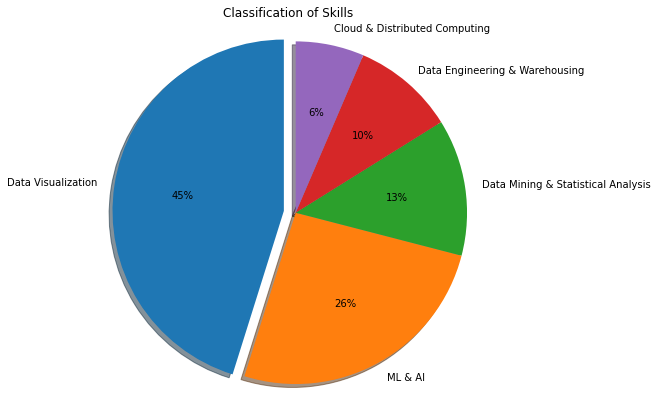

In [18]:
pie = plt.figure(figsize=(7,7))
plt.pie(summary['score'], labels=summary.index, explode = (0.07,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Classification of Skills')
plt.axis('equal')
plt.show()